In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from math import ceil
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
from sklearn.preprocessing import QuantileTransformer
def NMAE(true, pred):
    score = np.mean(np.abs(true-pred) / true)
    return score
import sklearn
from sklearn.preprocessing import *

def temp_sensible(dataframe):
    #체감온도 공식은 체감온도(℃)=13.12+0.6215×T-11.37V0.16+0.3965V0.16×T
    #출처:https://www.sciencetimes.co.kr/news/%EC%B2%B4%EA%B0%90%EC%98%A8%EB%8F%84%EC%99%80-%EC%8B%A4%EC%A0%9C-%EC%98%A8%EB%8F%84%EB%8A%94-%EC%96%B4%EB%96%BB%EA%B2%8C-%EB%8B%A4%EB%A5%B8%EA%B0%80/
    temp_df_t=dataframe['temp_mean'].tolist()
    temp_df_w=dataframe['wind_mean'].tolist()
    temp_df_t
    temp_df_w
    result_=[]
    for i in range(len(temp_df_t)):
        result=13.12+0.6215*temp_df_t[i]-11.37*math.pow(temp_df_w[i],0.16)+0.3965*math.pow(temp_df_w[i],0.16)*temp_df_t[i]
        result_.append(round(result,1))
    dataframe.insert(4,'temp_sensible',result_)

def discomfort_index(dataframe):
    
    #0.81 * temp_df_t[i] +0.01 * temp_df_t[i]*((0.99*temp_df_t[i]) - 14.3)+ 46.3
    #불쾌지수 공식(80이상 : 매우 불쾌, 80~75: 50%불쾌 , 68~75 :불쾌감 시작, 68미만: 쾌적함)
    #discomfort_index
    temp_df_t=dataframe['temp_mean'].tolist()
    temp_df_h=dataframe['humidity'].tolist()
    temp_df_t
    temp_df_h

    result_=[]
    for i in range(len(temp_df_t)):
        result=(9/5*temp_df_t[i])-0.55*(1-temp_df_h[i]/100)*(9/5*temp_df_t[i]-26)+32
        result_.append(round(result,1))
    result_
    dataframe['discomfort_index']=result_


def pm_trafficlight(dataframe):
    pm10=dataframe['PM10'].tolist()
    pm2=dataframe['PM2.5'].tolist()
    pm_=[]
    for i in range(len(pm10)):
        if(pm10[i]<=30 or pm2[i]<=15):
            pm_.append(1)
        elif((pm10[i]<=80 and pm10[i]>30) or (pm2[i] >=16 and pm2[i]<=50)):
            pm_.append(2)
        elif((pm10[i]<=150 and pm10[i]>80)or (pm2[i]>50 and pm2[i]<=100)):
            pm_.append(3)
        elif(pm10[i]>=150 or (pm2[i]>100)):
            pm_.append(4)
    dataframe['pm']=pm_

def rental_rate(dataframe):
    y1 = dataframe[dataframe['year'] == 2018]['rental'] * 2.3
    y2 = dataframe[dataframe['year'] == 2019]['rental'] * 1.2
    y3 = dataframe[dataframe['year'] == 2020]['rental']
    new = pd.concat([y1, y2, y3], axis=0).to_frame()
    dataframe['rental'] = new['rental']
    return True




def seperate_datetime(dataframe):
    week_list = []
    year = []
    month = []
    for date in dataframe.date:
        year_point, month_point, day_point = date.split('-')
        year.append(int(year_point) - 2017)
        month.append(int(month_point))
    dataframe['year'] = year
    dataframe['month'] = month
    for day in dataframe['date']:
        num = pd.date_range(day, day, freq='D').to_series()
        week_list.append(int(num.dt.dayofweek[0]))
    dataframe['day'] = week_list
    dataframe = dataframe.drop(['date'], axis=1)
    return dataframe

def enter_week(dataframe):
    w_list = [1.02,1.02, 0.97, 0.95, 1.02, 1.01, 1.02]
    #corr 해서 상관관계에 따라 비율 설정 
    for i in range(0, 7):
        dataframe[dataframe['day'] == i] *= w_list[i]
        
clist = ['PM2.5*day_name_Sunday']


In [2]:
sample = pd.read_csv('sample_submission.csv')
sample
test_df = pd.read_csv('test.csv')
test_df
train = pd.read_csv('train.csv')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
test_date = test_df['date']



In [3]:
train.head()

,date,precipitation,temp_mean,temp_highest,temp_lowest,PM10,PM2.5,humidity,sunshine_sum,sunshine_rate,wind_mean,wind_max,rental
0,2018-01-01,NaN,-1.3,3.8,-5.1,34.0,17.0,39.1,8.3,86.5,1.4,3.8,4950
1,2018-01-02,NaN,-1.8,1.8,-4.3,36.0,22.0,42.0,7.9,82.3,1.8,4.9,7136
2,2018-01-03,NaN,-4.7,-0.4,-7.1,31.0,19.0,42.3,8.6,88.7,2.2,3.5,7156
3,2018-01-04,NaN,-4.7,-0.7,-8.7,39.0,24.0,43.0,6.2,63.9,1.4,3.5,7102
4,2018-01-05,NaN,-3.0,1.6,-5.6,51.0,35.0,48.4,8.2,84.5,1.7,3.6,7705


In [4]:
    
train['holiday']=0
train.loc[train['date']=='2018-01-01', 'holiday'] =1
train.loc[train['date']=='2018-02-15', 'holiday'] =1
train.loc[train['date']=='2018-02-16', 'holiday'] =1
train.loc[train['date']=='2018-02-17', 'holiday'] =1
train.loc[train['date']=='2018-03-01', 'holiday'] =1
train.loc[train['date']=='2018-05-05', 'holiday'] =1
train.loc[train['date']=='2018-05-07', 'holiday'] =1
train.loc[train['date']=='2018-05-22', 'holiday'] =1
train.loc[train['date']=='2018-06-06', 'holiday'] =1
train.loc[train['date']=='2018-06-13', 'holiday'] =1
train.loc[train['date']=='2018-08-15', 'holiday'] =1
train.loc[train['date']=='2018-09-23', 'holiday'] =1
train.loc[train['date']=='2018-09-24', 'holiday'] =1
train.loc[train['date']=='2018-09-25', 'holiday'] =1
train.loc[train['date']=='2018-09-26', 'holiday'] =1
train.loc[train['date']=='2018-10-03', 'holiday'] =1
train.loc[train['date']=='2018-10-09', 'holiday'] =1
train.loc[train['date']=='2018-12-25', 'holiday'] =1

train.loc[train['date']=='2019-01-01', 'holiday'] =1
train.loc[train['date']=='2019-02-04', 'holiday'] =1
train.loc[train['date']=='2019-02-05', 'holiday'] =1
train.loc[train['date']=='2019-02-06', 'holiday'] =1
train.loc[train['date']=='2019-03-01', 'holiday'] =1
train.loc[train['date']=='2019-05-12', 'holiday'] =1
train.loc[train['date']=='2019-06-06', 'holiday'] =1
train.loc[train['date']=='2019-08-15', 'holiday'] =1
train.loc[train['date']=='2019-09-12', 'holiday'] =1
train.loc[train['date']=='2019-09-13', 'holiday'] =1
train.loc[train['date']=='2019-09-14', 'holiday'] =1
train.loc[train['date']=='2019-10-03', 'holiday'] =1
train.loc[train['date']=='2019-10-09', 'holiday'] =1
train.loc[train['date']=='2019-12-25', 'holiday'] =1

train.loc[train['date']=='2020-01-01', 'holiday'] =1
train.loc[train['date']=='2020-01-24', 'holiday'] =1
train.loc[train['date']=='2020-01-25', 'holiday'] =1
train.loc[train['date']=='2020-01-26', 'holiday'] =1
train.loc[train['date']=='2020-01-27', 'holiday'] =1
train.loc[train['date']=='2020-03-01', 'holiday'] =1
train.loc[train['date']=='2020-04-15', 'holiday'] =1
train.loc[train['date']=='2020-04-30', 'holiday'] =1
train.loc[train['date']=='2020-05-05', 'holiday'] =1
train.loc[train['date']=='2020-06-06', 'holiday'] =1
train.loc[train['date']=='2020-08-15', 'holiday'] =1
train.loc[train['date']=='2020-08-17', 'holiday'] =1
train.loc[train['date']=='2020-09-30', 'holiday'] =1
train.loc[train['date']=='2020-10-01', 'holiday'] =1
train.loc[train['date']=='2020-10-02', 'holiday'] =1
train.loc[train['date']=='2020-10-03', 'holiday'] =1
train.loc[train['date']=='2020-10-09', 'holiday'] =1
train.loc[train['date']=='2020-12-25', 'holiday'] =1


test_df.loc[train['date']=='2021-01-01', 'holiday'] =1
test_df.loc[train['date']=='2021-02-11', 'holiday'] =1
test_df.loc[train['date']=='2021-02-12', 'holiday'] =1
test_df.loc[train['date']=='2021-02-13', 'holiday'] =1
test_df.loc[train['date']=='2021-03-01', 'holiday'] =1
test_df.loc[train['date']=='2021-05-05', 'holiday'] =1
test_df.loc[train['date']=='2021-05-19', 'holiday'] =1
test_df.loc[train['date']=='2021-06-06', 'holiday'] =1
test_df.loc[train['date']=='2021-08-15', 'holiday'] =1
test_df.loc[train['date']=='2021-08-16', 'holiday'] =1
test_df.loc[train['date']=='2021-09-20', 'holiday'] =1
test_df.loc[train['date']=='2021-09-21', 'holiday'] =1
test_df.loc[train['date']=='2021-09-22', 'holiday'] =1
test_df.loc[train['date']=='2021-10-03', 'holiday'] =1
test_df.loc[train['date']=='2021-10-04', 'holiday'] =1
test_df.loc[train['date']=='2021-10-09', 'holiday'] =1
test_df.loc[train['date']=='2021-10-11', 'holiday'] =1
test_df.loc[train['date']=='2021-12-25', 'holiday'] =1
test_df.loc[train['date']=='2021-12-27', 'holiday'] =1



In [5]:
date=train['date'].tolist()
cnt=0
year=[]
month=[]
day=[]
year_=''
month_=''
day_=''
for _ in date:
    list_=_.split('-')
    for i in range(3):
        if(i==0):

            year_+=list_[i]
        
        elif(i==1):
            month_+=list_[i]
        elif(i==2):
            day_+=list_[i]
            
    year.append(int(year_))
    month.append(int(month_))
    day.append(int(day_))
    
    cnt+=1
    year_=''
    month_=''
    day_=''
train_=train.drop(columns='date')
train_['year']=year
train_['month']=month
train_['day']=day

train_['precipitation']=train_['precipitation'].fillna(0)
train_['PM10'] = train_['PM10'].fillna(train_['PM10'].mean())
train_['PM2.5'] = train_['PM2.5'].fillna(train_['PM2.5'].mean())
train_ = train_.fillna(train_.mean())
rental_rate(train_)
train_.isnull().sum()

precipitation    0
temp_mean        0
temp_highest     0
temp_lowest      0
PM10             0
PM2.5            0
humidity         0
sunshine_sum     0
sunshine_rate    0
wind_mean        0
wind_max         0
rental           0
holiday          0
year             0
month            0
day              0
dtype: int64

In [6]:

day = []

for i in range(0,614):
    if train_.index[i] % 7 == 0:
        day.append("Monday")
    elif train_.index[i] % 7 == 1:
        day.append("Tuesday")
    elif train_.index[i] % 7 ==2:
        day.append("Wednesday")
    elif train_.index[i] % 7 == 3:
        day.append("Thursday")
    elif train_.index[i] % 7 == 4:
        day.append("Friday")
    elif train_.index[i] % 7 == 5:
        day.append("Saturday")
    elif train_.index[i] % 7 == 6:
        day.append("Sunday")
        
for i in range(0,len(train_.day)-614):
    if train_.index[i] % 7 == 0:
        day.append("Sunday")
    elif train_.index[i] % 7 == 1:
        day.append("Monday")
    elif train_.index[i] % 7 == 2:
        day.append("Tuesday")
    elif train_.index[i] % 7 == 3:
        day.append("Wednesday")
    elif train_.index[i] % 7 == 4:
        day.append("Thursday")
    elif train_.index[i] % 7 == 5:
        day.append("Friday")
    elif train_.index[i] % 7 == 6:
        day.append("Saturday")
 

train_["day_name"] = day
train_= pd.get_dummies(data = train_,columns = ['day_name'])
train_["rental"] = np.log1p(train_["rental"])
train_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   precipitation       1095 non-null   float64
 1   temp_mean           1095 non-null   float64
 2   temp_highest        1095 non-null   float64
 3   temp_lowest         1095 non-null   float64
 4   PM10                1095 non-null   float64
 5   PM2.5               1095 non-null   float64
 6   humidity            1095 non-null   float64
 7   sunshine_sum        1095 non-null   float64
 8   sunshine_rate       1095 non-null   float64
 9   wind_mean           1095 non-null   float64
 10  wind_max            1095 non-null   float64
 11  rental              1095 non-null   float64
 12  holiday             1095 non-null   int64  
 13  year                1095 non-null   int64  
 14  month               1095 non-null   int64  
 15  day                 1095 non-null   int64  
 16  day_na

In [7]:
date=test_df['date'].tolist()
cnt=0
year=[]
month=[]
day=[]
year_=''
month_=''
day_=''
for _ in date:
    list_=_.split('-')
    for i in range(3):
        if(i==0):

            year_+=list_[i]
        
        elif(i==1):
            month_+=list_[i]
        elif(i==2):
            day_+=list_[i]
            
    year.append(int(year_))
    month.append(int(month_))
    day.append(int(day_))
    
    cnt+=1
    year_=''
    month_=''
    day_=''
test_df=test_df.drop(columns='date')
test_df['year']=year
test_df['month']=month
test_df['day']=day
test_df
test_df['precipitation']=test_df['precipitation'].fillna(0)
print(test_df.isnull().sum())


test_df=test_df.fillna(test_df.mean())

precipitation      0
temp_mean          0
temp_highest       0
temp_lowest        0
PM10               0
PM2.5              0
humidity           0
sunshine_sum       1
sunshine_rate      0
wind_mean          0
wind_max           0
holiday          365
year               0
month              0
day                0
dtype: int64


In [8]:
day2= []

for i in range(0,365):
    if test_df.index[i] % 7 == 0:
        day2.append("Friday")
    elif test_df.index[i] % 7 == 1:
        day2.append("Saturday")
    elif test_df.index[i] % 7 ==2:
        day2.append("Sunday")
    elif test_df.index[i] % 7 == 3:
        day2.append("Monday")
    elif test_df.index[i] % 7 == 4:
        day2.append("Tuesday")
    elif test_df.index[i] % 7 == 5:
        day2.append("Wednesday")
    elif test_df.index[i] % 7 == 6:
        day2.append("Thursday")

test_df["day_name"] = day2
test_df
test_df = pd.get_dummies(data = test_df,columns = ["day_name"])


In [9]:
discomfort_index(train_)
temp_sensible(train_)
discomfort_index(test_df)
temp_sensible(test_df)
#일교차
train_.insert(5,'temp_diff',train_['temp_highest'] - train_['temp_lowest'])
test_df.insert(5,'temp_diff',train_['temp_highest'] - train_['temp_lowest'])
#미세먼지 신호등
pm_trafficlight(train_)
pm_trafficlight(test_df)

In [10]:
train_['PM10']

0       34.0
1       36.0
2       31.0
3       39.0
4       51.0
        ... 
1090    70.0
1091    66.0
1092    69.0
1093    39.0
1094    28.0
Name: PM10, Length: 1095, dtype: float64

In [11]:
scaler1 = QuantileTransformer()
scaler2 = QuantileTransformer()
# col___list = ['PM10','PM2.5','sunshine_rate','sunshine_sum']
# col___list = ['PM10','PM2.5','sunshine_rate','sunshine_sum', 'precipitation', 'PM10','PM2.5','wind_mean','wind_max']
# col___list = ['PM10','PM2.5','sunshine_rate','sunshine_sum', 'precipitation', 'PM10','PM2.5']
col___list = ['PM10','PM2.5','sunshine_rate','sunshine_sum', 'precipitation', 'PM10','PM2.5', 'precipitation'
             ,'sunshine_rate','sunshine_sum']
# col___list = ['PM10','PM2.5','sunshine_rate','sunshine_sum', 'precipitation', 'PM10','PM2.5','wind_mean'
#               ,'wind_max','temp_mean','temp_highest','temp_lowest','humidity']

# col___list = ['PM10','PM2.5','sunshine_rate','sunshine_sum', 'precipitation', 'PM10','PM2.5','wind_mean'
#               ,'wind_max','humidity']
# col___list = bicycle.columns
scaler1.fit(train_[col___list])
X_train_scaled = scaler1.transform(train_[col___list])
train_[col___list] =X_train_scaled
scaler2.fit(test_df[col___list])
X_train_scaled = scaler2.transform(test_df[col___list])
test_df[col___list] =X_train_scaled


/Users/haseung-won/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (365). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


In [12]:
#미세먼지 onehot
train_ = pd.get_dummies(data = train_,columns = ['pm'])
test_df = pd.get_dummies(data = test_df,columns = ['pm'])
test_df['pm_4']=0.0
test_df['pm_4']=test_df['pm_4'].astype('uint8')
train_['dust'] = train_['PM10'] * train_['PM2.5']
train_['temp_ratio'] = abs(train_['temp_highest'] - train_['temp_lowest'])

train_['daytime'] = train_['sunshine_rate'] / train_['sunshine_sum']
train_['daytime'] = train_['daytime'].fillna(method='bfill')

test_df['dust'] = test_df['PM10'] * test_df['PM2.5']
test_df['temp_ratio'] = abs(test_df['temp_highest'] - test_df['temp_lowest'])
test_df['daytime'] = test_df['sunshine_rate'] / test_df['sunshine_sum']
test_df['daytime'] = test_df['daytime'].fillna(method='bfill')


In [13]:
test_df=test_df.fillna(0)
train_=train_.drop(columns='sunshine_sum')
test_df=test_df.drop(columns='sunshine_sum')
#train_=train_.drop(columns='sunshine_rate')
#test_df=test_df.drop(columns='sunshine_rate')
#new_row = train_.loc[[613]]
#train_ = pd.concat([train_.iloc[:613], new_row, train_.iloc[613:]], ignore_index = True)


In [14]:
train = train.drop(index=788, axis = 0)
train_

,precipitation,temp_mean,temp_highest,temp_lowest,temp_sensible,temp_diff,PM10,PM2.5,humidity,sunshine_rate,...,day_name_Tuesday,day_name_Wednesday,discomfort_index,pm_1,pm_2,pm_3,pm_4,dust,temp_ratio,daytime
0,0.000000,-1.3,3.8,-5.1,-0.2,8.9,0.504505,0.396396,39.1,0.754755,...,0,0,39.2,0,1,0,0,0.199984,8.9,1.400186
1,0.000000,-1.8,1.8,-4.3,-1.3,6.1,0.545045,0.650651,42.0,0.669169,...,1,0,38.1,0,1,0,0,0.354634,6.1,1.354610
2,0.000000,-4.7,-0.4,-7.1,-4.8,6.7,0.441942,0.477978,42.3,0.831579,...,0,1,34.5,0,1,0,0,0.211239,6.7,1.452356
3,0.000000,-4.7,-0.7,-8.7,-3.8,8.0,0.661662,0.700701,43.0,0.473473,...,0,0,34.3,0,1,0,0,0.463627,8.0,1.238220
4,0.000000,-3.0,1.6,-5.6,-2.4,7.2,0.822823,0.878879,48.4,0.708709,...,0,0,35.5,0,1,0,0,0.723162,7.2,1.340909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,0.000000,5.8,10.0,1.4,6.8,8.6,0.946446,0.930931,62.9,0.452452,...,0,0,45.6,0,1,0,0,0.881076,8.6,1.234973
1091,0.809810,6.7,11.4,4.2,8.1,7.2,0.927427,0.940440,72.1,0.688689,...,0,0,46.2,0,1,0,0,0.872190,7.2,1.351670
1092,0.742242,0.1,4.3,-6.2,-0.3,10.5,0.941441,0.952953,70.8,0.000000,...,1,0,36.3,0,1,0,0,0.897149,10.5,1.400186
1093,0.000000,-10.9,-6.2,-12.9,-13.3,6.7,0.661662,0.324825,55.5,0.754755,...,0,1,23.5,1,0,0,0,0.214924,6.7,1.400186


In [15]:
import xgboost
from xgboost import XGBRegressor
from xgboost import XGBRegressor as model

y = train_['rental']
x= train_.drop('rental',axis =1)
model = XGBRegressor(objective='reg:squarederror',learning_rate=0.1,max_depth = 4, n_estimators = 1000)



model.fit(x, y)
pred = model.predict(test_df)                                   
      


In [16]:
                     
pred = pd.DataFrame(pred, columns=['rental'])
pred = np.expm1(pred)*1.35

In [17]:
# # sns.pairplot(data_df, hue = 'date_year', markers = ['o','s','d'])
# # plt.show()
# sns.pairplot(train)

In [18]:
result = pd.concat([test_date, pred],axis=1)
result = seperate_datetime(result)
enter_week(result)
# enter_month(result)
result = pd.concat([test_df, result['rental']],axis=1)
real_data = pd.read_csv('real_data.csv')
NMAE(real_data['rental'],pred['rental'])
#0.20994305332561805
#0.1759140807412157
#0.17160655151714022 result_2
#0.169358561366779
#0.16833088271950228 #1.03 예측값에 곱하면 더 오른다.
#0.1636956776772946 예측할때 곱하는거
#0.16183995947493923
# 0.16131674637594595

0.15971368643401082

In [19]:
sample['rental'] = pred
sample

,date,rental
0,2021-01-01,27550.500000
1,2021-01-02,26879.683594
2,2021-01-03,17775.929688
3,2021-01-04,33266.390625
4,2021-01-05,26452.082031
...,...,...
360,2021-12-27,34484.773438
361,2021-12-28,37353.417969
362,2021-12-29,46339.921875
363,2021-12-30,35921.660156


In [20]:

sample.to_csv('0.15971368643401077.csv',index=False, encoding = 'UTF-8')
real_data

,date,rental
0,2021-01-01,22274
1,2021-01-02,23631
2,2021-01-03,21809
3,2021-01-04,32957
4,2021-01-05,29033
...,...,...
360,2021-12-27,42521
361,2021-12-28,51268
362,2021-12-29,52017
363,2021-12-30,48993


In [21]:
# p1=sum(train_[train_['year']==2018]['PM10'])
# p2=sum(train_[train_['year']==2019]['PM10'])
# p3=sum(train_[train_['year']==2020]['PM10'])

# print(p3/p1)
# print(p3/p2)

In [22]:
# fu=pred[(pred['rental']>=100000)&(pred['rental']<=140000)]['rental'].index.unique()
# fu

In [23]:
# tt=[]
# for _ in fu:
#     tt.append(train_.loc[_]['PM10'])
# tt

In [24]:
# real_data[(real_data['rental']>=100000)&(real_data['rental']<=140000)]['date'].unique()



In [25]:
p1=pred[['rental']]
p1['rental1']=real_data['rental']
p1

,rental,rental1
0,27550.500000,22274
1,26879.683594,23631
2,17775.929688,21809
3,33266.390625,32957
4,26452.082031,29033
...,...,...
360,34484.773438,42521
361,37353.417969,51268
362,46339.921875,52017
363,35921.660156,48993


No handles with labels found to put in legend.


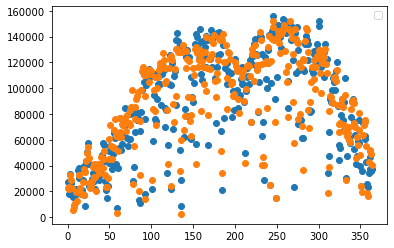

In [26]:
#vkfkd색이 예측값
# 주황색이 실제값
plt.scatter(p1.index,p1['rental'])
plt.scatter(p1.index,p1['rental1'])
plt.legend()
plt.show()

In [27]:
sum(pred['rental']*1.06)

33362658.864257812

In [28]:
sum(real_data['rental'])

32054693

No handles with labels found to put in legend.


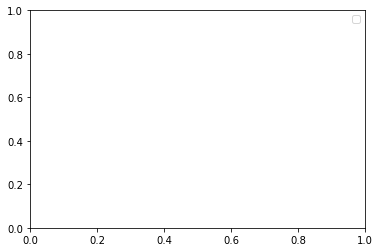

In [29]:
plt.legend()
plt.show()